In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Load the DATA

In [2]:
# 1. Load the Data
train_data = pd.read_csv('train.csv')  # Load train data (50000 x 3073)
test_data = pd.read_csv('test.csv')    # Load test data (10000 x 3072)


In [3]:
train_data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [4]:
test_data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,...,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,...,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,...,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,...,102,127,156,139,131,130,147,136,146,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,76,77,76,75,76,76,76,76,78,...,228,185,177,223,239,239,235,236,234,236
9996,81,91,98,106,108,110,80,84,88,90,...,126,107,143,155,156,160,173,129,147,160
9997,20,19,15,15,14,13,12,11,10,9,...,114,112,68,50,52,52,51,50,53,47
9998,25,15,23,17,23,51,74,91,114,137,...,87,84,83,84,79,78,78,80,81,80


## Preprocessing the train data

In [5]:
# 2. Preprocessing the Train Data
X_train = train_data.iloc[:, :-1].values  # Features: All columns except the last (3072 features)
y_train = train_data.iloc[:, -1].values   # Labels: Last column (class label)


In [6]:
# Normalize/Standardize the data (important for ANN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [8]:
from sklearn.utils import shuffle
# Shuffle the data
X_train,y_train = shuffle(X_train,y_train,random_state=42)

# Ensure you are splitting both X and y together, so they align
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels if they are not already one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train (one-hot encoded):", y_train.shape)
print("Shape of y_test (one-hot encoded):", y_test.shape)


Shape of y_train (one-hot encoded): (40000, 10)
Shape of y_test (one-hot encoded): (10000, 10)


## Build ANN Model

In [10]:
# Define the ANN model
model = Sequential([
    # Input layer
    Dense(512, activation='relu', input_shape=(3072,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=64, 
                    validation_data=(X_test, y_test))


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3489 - loss: 1.8815 - val_accuracy: 0.4274 - val_loss: 1.6219
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4519 - loss: 1.5434 - val_accuracy: 0.4480 - val_loss: 1.5581
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5022 - loss: 1.4070 - val_accuracy: 0.4610 - val_loss: 1.5339
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5335 - loss: 1.3236 - val_accuracy: 0.4759 - val_loss: 1.4956
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5592 - loss: 1.2519 - val_accuracy: 0.4913 - val_loss: 1.4922
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5822 - loss: 1.1817 - val_accuracy: 0.4899 - val_loss: 1.4712
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6006 - loss: 1.1163 - val_accuracy: 0.4965 - val_loss: 1.4809
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6283 - loss: 1.0565 - val_accuracy: 0.

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss using train: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4926 - loss: 2.6774
Test accuracy: 49.80%
Test loss using train: 49.80%


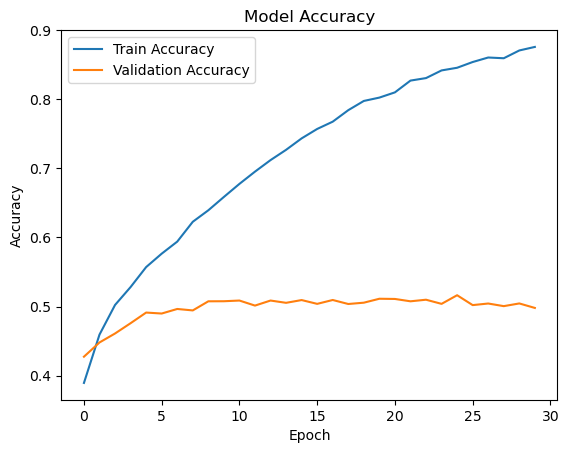

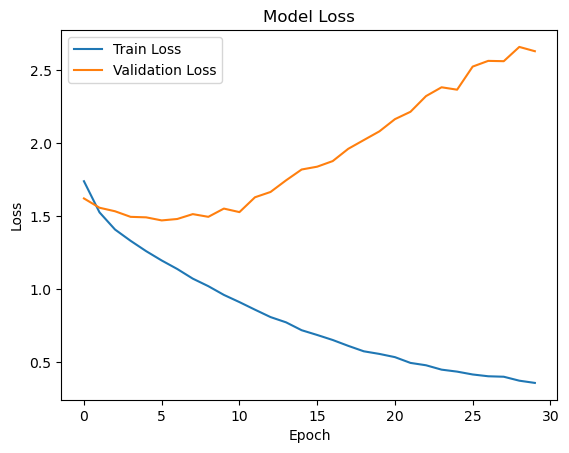

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
# Define the ANN model
model = Sequential([
    # Input layer
    Dense(512, activation='relu', input_shape=(3072,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# optimizer
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=64, 
                    validation_data=(X_test, y_test))

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3587 - loss: 1.8082 - val_accuracy: 0.4571 - val_loss: 1.5341
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4952 - loss: 1.4387 - val_accuracy: 0.4687 - val_loss: 1.5016
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5343 - loss: 1.3182 - val_accuracy: 0.4798 - val_loss: 1.4808
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5696 - loss: 1.2097 - val_accuracy: 0.4967 - val_loss: 1.4574
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6028 - loss: 1.1239 - val_accuracy: 0.4917 - val_loss: 1.4912
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6256 - loss: 1.0538 - val_accuracy: 0.4970 - val_loss: 1.4882
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6556 - loss: 0.9775 - val_accuracy: 0.4937 - val_loss: 1.5657
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6689 - loss: 0.9301 - val_accuracy: 0.

In [22]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4909 - loss: 3.0455
Test accuracy: 49.95%
Test loss: 2.978480339050293


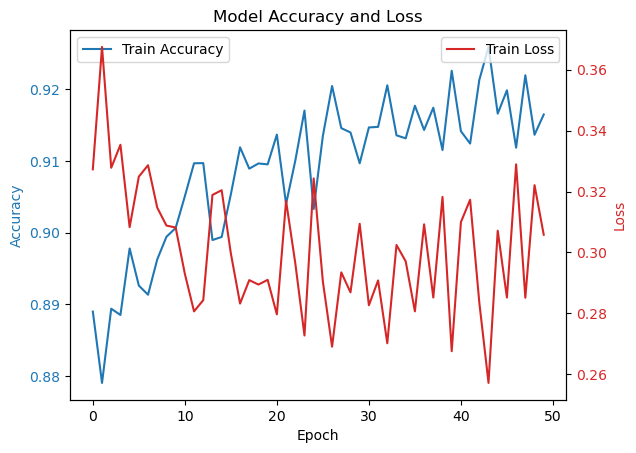

In [48]:
import matplotlib.pyplot as plt

# Create a figure and two subplots (axes)
fig, ax1 = plt.subplots()

# Plot training accuracy on the first subplot (ax1)
ax1.plot(history.history['accuracy'], label='Train Accuracy', color='tab:blue')
ax1.set_title('Model Accuracy and Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the loss
ax2 = ax1.twinx()  
ax2.plot(history.history['loss'], label='Train Loss', color='tab:red')
ax2.set_ylabel('Loss', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends for both plots
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()



## Test Data

In [27]:
# 3. Preprocessing the Test Data
X_test = test_data.values  # Test features (3072 features)
X_test = scaler.transform(X_test)  # Normalize the test data using the same scaler

In [43]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model on the test set
test_results = model.evaluate(X_test,y_test)  # Pass X_test and y_test here

# If you have multiple metrics, test_results might be a list or tuple
# Assuming test_results = [loss, accuracy]
test_loss = test_results[0]  # The first element is the loss
test_acc = test_results[1]   # The second element is the accuracy

print(f"Test prediction using test data: {y_pred}")
print(f"Test accuracy: {test_acc*100:.2f}%")  

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0957 - loss: 20.4579
Test prediction using test data: [[6.5411270e-01 1.8569022e-04 4.2530772e-07 ... 3.9025258e-13
  4.0412992e-06 6.4592403e-12]
 [2.0681796e-04 7.8845760e-06 5.7527092e-07 ... 1.1646298e-10
  9.9976891e-01 7.0443482e-09]
 [3.9633861e-01 2.7913800e-01 2.4936662e-05 ... 1.3168862e-03
  3.1601399e-01 6.2037740e-05]
 ...
 [3.2740125e-01 7.4101167e-06 8.6076997e-02 ... 4.5936597e-03
  4.4414979e-01 6.6461849e-05]
 [4.9763048e-07 6.4526165e-07 7.6630811e-04 ... 4.5253870e-08
  3.8360154e-06 2.4984732e-09]
 [2.9821775e-13 4.2404646e-15 7.6162470e-12 ... 9.9999356e-01
  1.2778772e-19 1.2651223e-13]]
Test accuracy: 9.80%


In [44]:
X_test.shape

(10000, 3072)

In [45]:
y_test.shape

(10000, 10)

## Direct loading the data

In [49]:
import tensorflow as tf

# Load the CIFAR-10 dataset directly from Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Check the shape of the training and testing data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 127s 1us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Test labels shape: (10000, 1)


In [50]:
# Flatten the image data to 1D
x_train_flattened = x_train.reshape(x_train.shape[0], -1)  # Shape (50000, 3072)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)    # Shape (10000, 3072)

# Convert labels to 1D
y_train_flattened = y_train.flatten()  # Shape (50000,)
y_test_flattened = y_test.flatten()    # Shape (10000,)

# Convert to DataFrame for easy CSV export
train_df = pd.DataFrame(x_train_flattened)
train_df['label'] = y_train_flattened  # Add labels as the last column

test_df = pd.DataFrame(x_test_flattened)
test_df['label'] = y_test_flattened  # Add labels as the last column

# Save to CSV
train_df.to_csv('cifar10_train.csv', index=False)
test_df.to_csv('cifar10_test.csv', index=False)

print("CIFAR-10 dataset saved as 'cifar10_train.csv' and 'cifar10_test.csv'.")

CIFAR-10 dataset saved as 'cifar10_train.csv' and 'cifar10_test.csv'.
